In [2]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the initial data

In [3]:
os.chdir('./all_factors_new/')
def process_xlsx(df):
    df.index = df.iloc[:,0]
    del df[df.columns[0]]
    df.columns = df.iloc[2,:].values
    df = df.iloc[5:]
    df.index = pd.to_datetime(df.index) 
    return df.fillna(method = 'pad').fillna(method = 'bfill')
data_list = {}
for file in tqdm(os.listdir()):
    if file != 'NET_INCOME.xlsx' and file[0] != '.':
        temp_data = pd.read_excel(file)
        data_list[file[:-5]] = process_xlsx(temp_data)

100%|██████████| 22/22 [02:37<00:00,  7.14s/it]


In [4]:
df = pd.read_excel('NET_INCOME.xlsx')
from copy import deepcopy
df_copy = deepcopy(df)
for i in range(len(df.columns)):
    if (i > 0) and (i % 3 == 0 or i % 3 == 2):
        del df_copy[df.columns[i]]

In [5]:
df_copy.index = df_copy['Start Date']
del df_copy['Start Date']
df_copy.columns = data_list['PRICE_LAST'].columns
df_copy = df_copy.iloc[4:]
df_copy.index = pd.to_datetime(df_copy.index)
df_copy = df_copy.fillna(method = 'pad').fillna(method = 'bfill')

In [6]:
data_list.keys()

dict_keys(['BEST_SALES', 'BETA_RAW_OVERRIDABLE', 'CAPITAL_EXPEND', 'CASH_TO_TOT_ASSET', 'DIVIDENDS_INDICATED_YIELD', 'DIVIDENDS_PER_SHARE', 'EARNINGS_PER_SHARE', 'EBIT', 'EBITDA', 'FCF_TO_TOTAL_DEBT', 'FREE_CASH_FLOW_YIELD', 'GEO_GROW_NET_INC', 'IS_INT_EXPENSE', 'MARKET_CAP', 'NET_DEBT', 'PRICE_LAST', 'RETURN_COM_EQY', 'TOTAL_ASSETS', 'TOTAL_ASSETS_GEO_GROWTH', 'VOLUME'])

In [7]:
data_list['NET_INCOME'] = df_copy

In [ ]:
#Calculate the factors

In [ ]:
#Momentum

In [8]:
total_return_6m = data_list['PRICE_LAST'] / data_list['PRICE_LAST'].shift(125) - 1
total_return_12m = data_list['PRICE_LAST'] / data_list['PRICE_LAST'].shift(250) - 1
total_return_3m = data_list['PRICE_LAST'] / data_list['PRICE_LAST'].shift(65) - 1
total_return_1m = data_list['PRICE_LAST'] / data_list['PRICE_LAST'].shift(5) - 1

In [ ]:
#Tech

In [9]:
price_to_200ma = data_list['PRICE_LAST'] / data_list['PRICE_LAST'].rolling(200).mean()
price_to_52_week_high = data_list['PRICE_LAST'] / data_list['PRICE_LAST'].rolling(250).mean()

In [ ]:
#Size

In [10]:
net_income_12m = data_list['NET_INCOME'].rolling(250).sum()
market_cap = data_list['MARKET_CAP']
total_assets = data_list['TOTAL_ASSETS']

In [19]:
#Trading

In [11]:
volume_to_20_day_ma = data_list['VOLUME'] / data_list['VOLUME'].rolling(20).mean()

In [21]:
#Volatility

In [22]:
### Beta_5Y = data_list['BETA_RAW_OVERRIDABLE']

In [12]:
volatility_1y = data_list['PRICE_LAST'].rolling(250).std()
volatility_3m = data_list['PRICE_LAST'].rolling(65).std()
volatility_1m = data_list['PRICE_LAST'].rolling(20).std()
volatility_1w = data_list['PRICE_LAST'].rolling(5).std()

In [ ]:
#Dividends

In [13]:
dividend_to_net_income = data_list['DIVIDENDS_PER_SHARE'] / data_list['NET_INCOME'].rolling(750).mean()
dividend_indicated_yield = data_list['DIVIDENDS_INDICATED_YIELD']

In [ ]:
#Growth

In [14]:
Total_Assets_5_year_growth = data_list['TOTAL_ASSETS'] / data_list['TOTAL_ASSETS'].shift(1250) - 1
EPS_growth_12m = data_list['EARNINGS_PER_SHARE'] / data_list['EARNINGS_PER_SHARE'].shift(250) - 1
net_income_5y_growth_rate = data_list['NET_INCOME'] / data_list['NET_INCOME'].shift(1250) - 1

In [ ]:
#Leverage

In [ ]:
### FCF_12m_to_debt_lf = data_list['F'].rolling(250).mean()

In [15]:
cash_to_total_assets = data_list['CASH_TO_TOT_ASSET']
ebit_12m_to_interst_expense_12m = data_list['EBIT'].rolling(250).mean() / data_list['IS_INT_EXPENSE'].rolling(250).mean()
net_debt_12m_to_ebitda_12m = data_list['NET_DEBT'].rolling(250).mean() / data_list['EBITDA'].rolling(250).mean()

In [ ]:
#Profitability

In [16]:
roe_to_roe_5y = data_list['RETURN_COM_EQY'].rolling(250).mean() - data_list['RETURN_COM_EQY'].rolling(1250).mean()
roe_to_roe_5y_divide = data_list['RETURN_COM_EQY'].rolling(250).mean() / data_list['RETURN_COM_EQY'].rolling(1250).mean()

In [17]:
roe_avg_3y = data_list['RETURN_COM_EQY'].rolling(750).mean()
roe_avg_5y = data_list['RETURN_COM_EQY'].rolling(1250).mean()
roe_12m = data_list['RETURN_COM_EQY'].rolling(250).mean()

In [18]:
capex_to_sales = data_list['CAPITAL_EXPEND'] / data_list['BEST_SALES'].rolling(250).mean()
capex_to_assets = data_list['CAPITAL_EXPEND'] / data_list['TOTAL_ASSETS'].rolling(250).mean()

In [ ]:
#Value

In [19]:
fcf_yield_12m = data_list['FREE_CASH_FLOW_YIELD'].rolling(250).mean()
eps_to_price = data_list['EARNINGS_PER_SHARE'].rolling(250).mean() / data_list['PRICE_LAST']

# Store Data

In [20]:
os.chdir('../factors/')

In [21]:
ind = (total_return_6m.index > '2015-01-01') & (total_return_6m.index < '2018-02-10')

In [22]:
total_return_6m[ind].to_pickle('total_return_6m.pickle')
total_return_12m[ind].to_pickle('total_return_12m.pickle')
total_return_3m[ind].to_pickle('total_return_3m.pickle')
total_return_1m[ind].to_pickle('total_return_1m.pickle')

In [23]:
price_to_200ma[ind].to_pickle('price_to_200ma.pickle')
price_to_52_week_high[ind].to_pickle('price_to_52_week_high.pickle')
net_income_12m[ind].to_pickle('net_income_12m.pickle')
market_cap[ind].to_pickle('market_cap.pickle')
total_assets[ind].to_pickle('total_assets.pickle')

In [24]:
volume_to_20_day_ma[ind].to_pickle('volume_to_20_day_ma.pickle')
volatility_1y[ind].to_pickle('volatility_1y.pickle')
volatility_3m[ind].to_pickle('volatility_3m.pickle')
volatility_1m[ind].to_pickle('volatility_1m.pickle')
volatility_1w[ind].to_pickle('volatility_1w.pickle')

In [25]:
dividend_to_net_income[ind].to_pickle('dividend_to_net_income.pickle')
dividend_indicated_yield[ind].to_pickle('dividend_indicated_yield.pickle')
Total_Assets_5_year_growth[ind].to_pickle('total_assets_5_year_growth.pickle')
EPS_growth_12m[ind].to_pickle('EPS_growth_12m.pickle')
net_income_5y_growth_rate[ind].to_pickle('net_income_5y_growth_rate.pickle')

In [26]:
cash_to_total_assets[ind].to_pickle('cash_to_total_assets.pickle')
ebit_12m_to_interst_expense_12m[ind].to_pickle('ebit_12m_to_interst_expense_12m.pickle')
net_debt_12m_to_ebitda_12m[ind].to_pickle('net_debt_12m_to_ebitda_12m.pickle')

In [27]:
roe_to_roe_5y[ind].to_pickle('roe_to_roe_5y.pickle')
roe_to_roe_5y_divide[ind].to_pickle('roe_to_roe_5y_divide.pickle')
roe_avg_3y[ind].to_pickle('roe_avg_3y.pickle')
roe_avg_5y[ind].to_pickle('roe_avg_5y.pickle')
roe_12m[ind].to_pickle('roe_12m.pickle')
capex_to_sales[ind].to_pickle('capex_to_sales.pickle')
capex_to_assets[ind].to_pickle('capex_to_assets.pickle')
fcf_yield_12m[ind].to_pickle('fcf_yield_12m.pickle')
eps_to_price[ind].to_pickle('eps_to_price.pickle')

In [28]:
ret1m = data_list['PRICE_LAST'].shift(-20) / data_list['PRICE_LAST'] - 1
ret1m[ind].to_pickle('ret_future_1m.pickle')

In [29]:
ret1m_current = data_list['PRICE_LAST'] / data_list['PRICE_LAST'].shift(20) - 1
ret1m_current[ind].to_pickle('ret_current_1m.pickle')

# Select factors

In [30]:
os.chdir('./..')

In [31]:
IC_summary = pd.read_csv('IC_summary.csv')
IC_summary.index = IC_summary[IC_summary.columns[0]]
del IC_summary[IC_summary.columns[0]]

In [32]:
factors_selected = list(IC_summary.sort_values('|mean|*sig_rate', ascending = False)[:19].index) + [(IC_summary.sort_values('|mean|*sig_rate', ascending = False).index[20])]

In [33]:
IC_summary.sort_values('|mean|*sig_rate', ascending = False)

,IC mean,IC significance rate,|mean|*sig_rate,current IC,current significance,current_IC to mean
Unnamed: 0,,,,,,
net_debt_12m_to_ebitda_12m,-0.047690,0.632552,0.030166,-0.219559,True,4.603899
ebit_12m_to_interst_expense_12m,0.057614,0.456227,0.026285,0.070306,False,1.220285
capex_to_assets,0.039718,0.655980,0.026054,0.158409,True,3.988369
cash_to_total_assets,0.042951,0.602959,0.025898,0.241700,True,5.627304
EPS_growth_12m,0.056282,0.431566,0.024290,-0.063653,False,-1.130956
fcf_yield_12m,0.033794,0.627620,0.021210,0.032545,False,0.963033
dividend_indicated_yield,-0.033567,0.517879,0.017384,-0.293746,True,8.751076
total_return_6m,0.020574,0.674476,0.013877,0.177933,True,8.648358
dividend_to_net_income,-0.024551,0.500617,0.012291,-0.104641,True,4.262129


In [34]:
factors_selected

['net_debt_12m_to_ebitda_12m',
 'ebit_12m_to_interst_expense_12m',
 'capex_to_assets',
 'cash_to_total_assets',
 'EPS_growth_12m',
 'fcf_yield_12m',
 'dividend_indicated_yield',
 'total_return_6m',
 'dividend_to_net_income',
 'total_return_12m',
 'total_assets',
 'price_to_52_week_high',
 'total_return_1m',
 'market_cap',
 'price_to_200ma',
 'net_income_5y_growth_rate',
 'capex_to_sales',
 'total_assets_5_year_growth',
 'net_income_12m',
 'volatility_1y']

In [35]:
factors_selected.remove('capex_to_sales')
factors_selected.append('roe_avg_3y')
# factors_selected.remove('ebit_12m_to_interst_expense_12m')

In [36]:
factors_selected

['net_debt_12m_to_ebitda_12m',
 'ebit_12m_to_interst_expense_12m',
 'capex_to_assets',
 'cash_to_total_assets',
 'EPS_growth_12m',
 'fcf_yield_12m',
 'dividend_indicated_yield',
 'total_return_6m',
 'dividend_to_net_income',
 'total_return_12m',
 'total_assets',
 'price_to_52_week_high',
 'total_return_1m',
 'market_cap',
 'price_to_200ma',
 'net_income_5y_growth_rate',
 'total_assets_5_year_growth',
 'net_income_12m',
 'volatility_1y',
 'roe_avg_3y']

In [37]:
ind = (total_return_6m.index > '2015-01-01') & (total_return_6m.index < '2018-02-10')
factors_selected_list = [net_debt_12m_to_ebitda_12m[ind], ebit_12m_to_interst_expense_12m[ind], 
                         capex_to_assets[ind], cash_to_total_assets[ind], EPS_growth_12m[ind], 
                         fcf_yield_12m[ind], dividend_indicated_yield[ind],
                          total_return_6m[ind], dividend_to_net_income[ind], total_return_12m[ind], 
                         total_assets[ind], price_to_52_week_high[ind], total_return_1m[ind], 
                         market_cap[ind], price_to_200ma[ind], net_income_5y_growth_rate[ind], 
                         Total_Assets_5_year_growth[ind], net_income_12m[ind], 
                         volatility_1y[ind],  roe_avg_3y[ind]]

# Calculate matrix

In [38]:
ret_current = ret1m_current[ind]

In [1]:
correlation_factors_data = list(map(lambda x:np.hstack(x.values)[::20], factors_selected_list))

NameError: name 'factors_selected_list' is not defined

In [ ]:
sns.heatmap(correlation_factors_data)

KeyboardInterrupt: 

In [39]:
# for fac in tqdm(factors_selected_list):
#     for col in tqdm(fac.columns):
#         fac[col].replace(np.inf, np.percentile(fac[col].values, 99), inplace = True)
#         fac[col].replace(-np.inf, np.percentile(fac[col].values, 1), inplace = True)
#         fac[col].fillna(fac[col].mean(), inplace = True)

In [40]:
# for fac in tqdm(factors_selected_list):
#     fac.fillna(fac.mean(), inplace = True)
# for fac in tqdm(factors_selected_list_2):
#     fac.fillna(0, inplace = True)

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

for t in tqdm(factors_selected_list[0].index):
    temp_loadings_df = (pd.DataFrame(list(map(lambda x:x.loc[t], factors_selected_list))).T)
    temp_loadings_df.columns = factors_selected
    for col in temp_loadings_df.columns:
        temp_loadings_df[col].replace(np.inf, np.percentile(temp_loadings_df[col], 99), inplace=True)
        temp_loadings_df[col].replace(-np.inf, np.percentile(temp_loadings_df[col], 1), inplace=True)
    temp_loadings_df.fillna(temp_loadings_df.mean(), inplace=True)
    factor_return_df.loc[t] = lr.fit(temp_loadings_df, ret_current.loc[t]).coef_
    alpha_left_df.loc[t] = np.array(ret_current.loc[t]) - np.hstack(np.matmul(temp_loadings_df.as_matrix(), 
                                      np.array(factor_return_df.loc[t].values, dtype=float).reshape(20,1)))

  0%|          | 0/811 [00:00<?, ?it/s]/Users/yiyangwen/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/yiyangwen/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)



NameError: name 'factor_return_df' is not defined

In [ ]:
# for fac in factors_selected_list:
#     for col in fac.columns:
#         fac[col].replace(np.inf, np.percentile(fac[col].values, 99), inplace=True)
#         fac[col].replace(-np.inf, np.percentile(fac[col].values, 1), inplace=True)
#         fac[col].fillna(fac[col].mean(), inplace = True)

In [811]:
sns.set_style("darkgrid")
plt.plot(np.cumsum(np.random.randn(1000,1)))
plt.show()
plt.plot(factor_return_df.index, factor_return_df[factor_return_df.columns[0]].values)

,A UN Equity,AAL UW Equity,AAP UN Equity,AAPL UW Equity,ABBV UN Equity,ABC UN Equity,ABT UN Equity,ACN UN Equity,ADBE UW Equity,ADI UW Equity,...,XL UN Equity,XLNX UW Equity,XOM UN Equity,XRAY UW Equity,XRX UN Equity,XYL UN Equity,YUM UN Equity,ZBH UN Equity,ZION UW Equity,ZTS UN Equity
Start Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-1.081698,7.876085,5.021179,-8.744112,3.639119,2.985057,0.909255,-3.425663,-10.439165,-13.623175,...,NaN,-4.921058,1.201339,9.175677,9.781996,5.028671,3.303849,-0.074280,NaN,10.742976
2015-01-05,-1.097263,7.840500,5.039714,-8.727321,3.662893,2.978804,0.928365,-3.424183,-10.452220,-13.595815,...,NaN,-4.919077,1.204651,9.166594,9.779295,5.025385,3.317406,-0.075801,NaN,10.736421
2015-01-06,-1.112957,7.805146,5.058208,-8.710594,3.686916,2.972501,0.947448,-3.422704,-10.465275,-13.568435,...,NaN,-4.917094,1.207971,9.157512,9.776595,5.022100,3.331058,-0.077325,NaN,10.729870
2015-01-07,-1.128783,7.770022,5.076660,-8.693931,3.711193,2.966147,0.966505,-3.421227,-10.478330,-13.541035,...,NaN,-4.915111,1.211298,9.148433,9.773896,5.018817,3.344807,-0.078852,NaN,10.723322
2015-01-08,-1.144741,7.735126,5.095072,-8.677331,3.735729,2.959741,0.985535,-3.419751,-10.491387,-13.513616,...,NaN,-4.913127,1.214634,9.139355,9.771200,5.015534,3.358653,-0.080382,NaN,10.716777
2015-01-09,-1.160835,7.700455,5.113443,-8.660794,3.760526,2.953283,1.004540,-3.418275,-10.504443,-13.486176,...,NaN,-4.911142,1.217978,9.130279,9.768505,5.012253,3.372598,-0.081914,NaN,10.710234
2015-01-12,-1.177065,7.666007,5.131772,-8.644320,3.785590,2.946772,1.023518,-3.416801,-10.517501,-13.458716,...,NaN,-4.909156,1.221330,9.121206,9.765811,5.008973,3.386643,-0.083449,NaN,10.703695
2015-01-13,-1.193433,7.631779,5.150061,-8.627908,3.810924,2.940208,1.042471,-3.415328,-10.530559,-13.431237,...,NaN,-4.907169,1.224690,9.112134,9.763120,5.005694,3.400788,-0.084988,NaN,10.697158
2015-01-14,-1.209941,7.597771,5.168310,-8.611557,3.836533,2.933589,1.061397,-3.413856,-10.543617,-13.403738,...,NaN,-4.905181,1.228058,9.103064,9.760430,5.002417,3.415035,-0.086529,NaN,10.690625


In [267]:
list(lambda x:np.hstack(x.values), factors_selected_list)

array([-1.08169835,  7.87608536,  5.02117905, ..., 20.41115114,
        0.        ,  8.07921944])

## alpha and factor returns

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = False)
factor_return_df = pd.DataFrame(index = ret_current.index, columns = factors_selected)
alpha_left_df = pd.DataFrame(index = ret_current.index, columns = factors_selected_list[0].columns)
for t in tqdm(factors_selected_list[0].index):
    temp_loadings_df = (pd.DataFrame(list(map(lambda x:x.loc[t], factors_selected_list))).T)
    temp_loadings_df.columns = factors_selected
    for col in temp_loadings_df.columns:
        temp_loadings_df[col].replace(np.inf, np.percentile(temp_loadings_df[col], 99), inplace=True)
        temp_loadings_df[col].replace(-np.inf, np.percentile(temp_loadings_df[col], 1), inplace=True)
    temp_loadings_df.fillna(temp_loadings_df.mean(), inplace=True)
    factor_return_df.loc[t] = lr.fit(temp_loadings_df, ret_current.loc[t]).coef_
    alpha_left_df.loc[t] = np.array(ret_current.loc[t]) - np.hstack(np.matmul(temp_loadings_df.as_matrix(), 
                                      np.array(factor_return_df.loc[t].values, dtype=float).reshape(20,1)))

  0%|          | 0/811 [00:00<?, ?it/s]/Users/yiyangwen/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
100%|██████████| 811/811 [00:44<00:00, 18.07it/s]


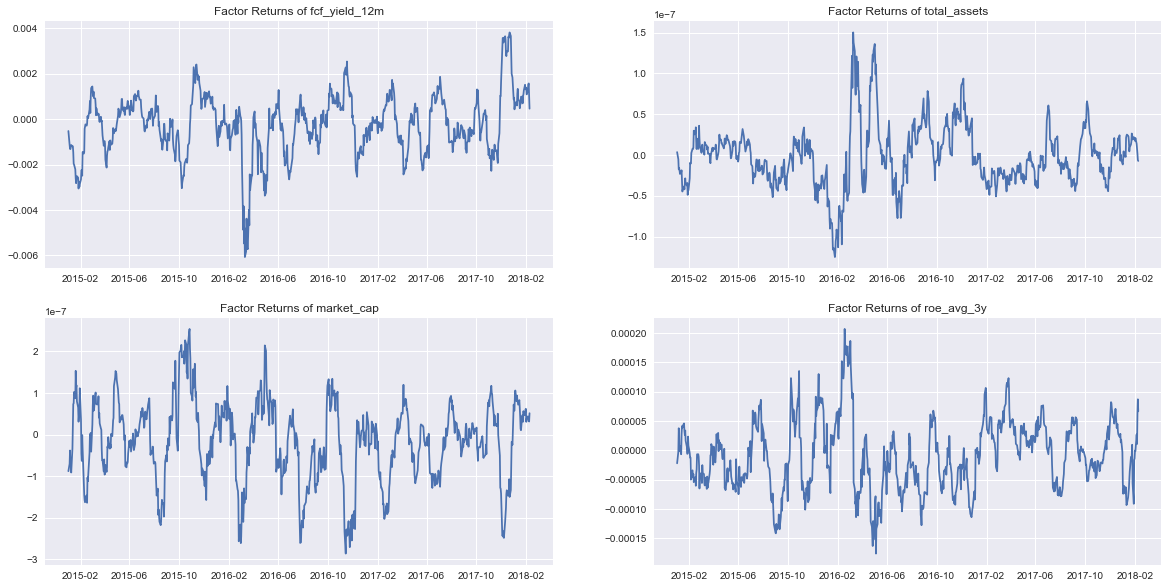

In [56]:
fig = plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
fig.add_subplot(221)
plt.plot(factor_return_df.index, factor_return_df[factor_return_df.columns[5]].values)
plt.title('Factor Returns of ' + factor_return_df.columns[5])
fig.add_subplot(222)
plt.plot(factor_return_df.index, factor_return_df[factor_return_df.columns[10]].values)
plt.title('Factor Returns of ' + factor_return_df.columns[10])
fig.add_subplot(223)
plt.plot(factor_return_df.index, factor_return_df[factor_return_df.columns[13]].values)
plt.title('Factor Returns of ' + factor_return_df.columns[13])
fig.add_subplot(224)
plt.plot(factor_return_df.index, factor_return_df[factor_return_df.columns[19]].values)
plt.title('Factor Returns of ' + factor_return_df.columns[19])
plt.show()

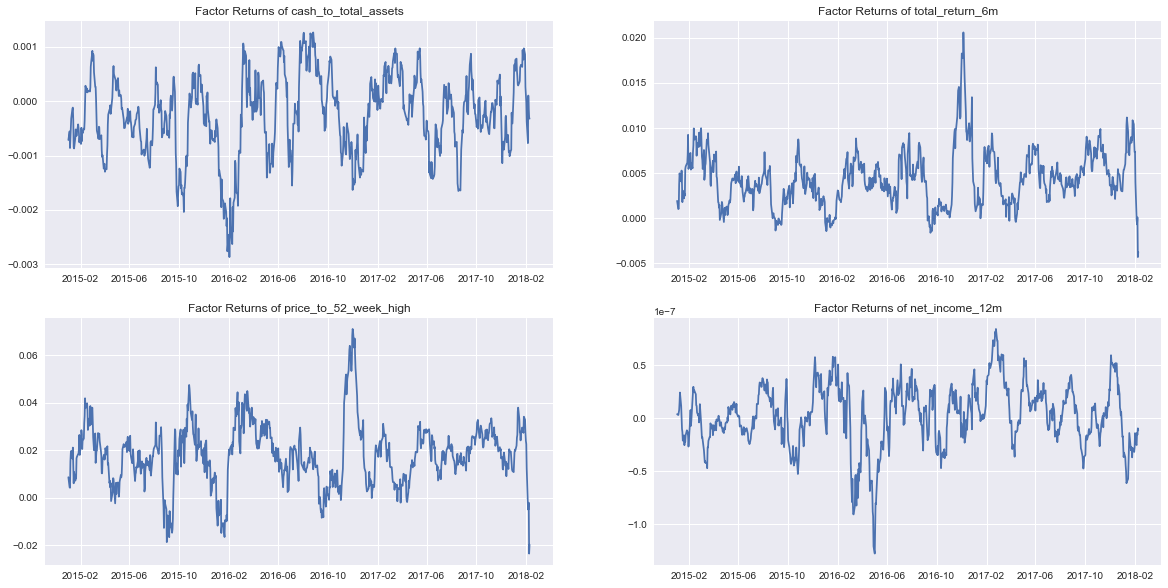

In [58]:
fig = plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
fig.add_subplot(221)
plt.plot(factor_return_df.index, factor_return_df[factor_return_df.columns[3]].values)
plt.title('Factor Returns of ' + factor_return_df.columns[3])
fig.add_subplot(222)
plt.plot(factor_return_df.index, factor_return_df[factor_return_df.columns[7]].values)
plt.title('Factor Returns of ' + factor_return_df.columns[7])
fig.add_subplot(223)
plt.plot(factor_return_df.index, factor_return_df[factor_return_df.columns[11]].values)
plt.title('Factor Returns of ' + factor_return_df.columns[11])
fig.add_subplot(224)
plt.plot(factor_return_df.index, factor_return_df[factor_return_df.columns[17]].values)
plt.title('Factor Returns of ' + factor_return_df.columns[17])
plt.show()

In [739]:
window = 5
factor_return_df_weighted = factor_return_df.rolling(window).mean()
alpha_df_weighted = alpha_left_df.rolling(window).mean()

In [157]:
window = 50

factor_return_df_weighted = factor_return_df.rolling(int(window / 10)).mean()
alpha_df_weighted = alpha_left_df.rolling(window).mean()

residual_df = pd.DataFrame(index = ret_current.index, columns = factors_selected_list[0].columns)
for t in tqdm(factors_selected_list[0].index):
    temp_loadings_df = (pd.DataFrame(list(map(lambda x:x.loc[t], factors_selected_list))).T)
    temp_loadings_df.columns = factors_selected
    for col in temp_loadings_df.columns:
        temp_loadings_df[col].replace(np.inf, np.percentile(temp_loadings_df[col], 99), inplace=True)
        temp_loadings_df[col].replace(-np.inf, np.percentile(temp_loadings_df[col], 1), inplace=True)
    temp_loadings_df.fillna(temp_loadings_df.mean(), inplace=True)
    residual_df.loc[t] = (np.array(ret_current.loc[t]) - np.hstack(np.matmul(temp_loadings_df.as_matrix(), 
                        np.array(factor_return_df.loc[t].values, dtype=float).reshape(20,1))) - 
                        np.array(alpha_df_weighted.loc[t]))    
residual_df_variance = (residual_df**2).rolling(window).mean()

residual_df = pd.DataFrame(index = ret_current.index, columns = factors_selected_list[0].columns)
for t in tqdm(factors_selected_list[0].index):
    temp_loadings_df = (pd.DataFrame(list(map(lambda x:x.loc[t], factors_selected_list))).T)
    temp_loadings_df.columns = factors_selected
    for col in temp_loadings_df.columns:
        temp_loadings_df[col].replace(np.inf, np.percentile(temp_loadings_df[col], 99), inplace=True)
        temp_loadings_df[col].replace(-np.inf, np.percentile(temp_loadings_df[col], 1), inplace=True)
    temp_loadings_df.fillna(temp_loadings_df.mean(), inplace=True)
    residual_df.loc[t] = (np.array(ret_current.loc[t]) - np.hstack(np.matmul(temp_loadings_df.as_matrix(), 
                        np.array(factor_return_df.loc[t].values, dtype=float).reshape(20,1))) - 
                        np.array(alpha_df_weighted.loc[t]))    
residual_df_variance = (residual_df**2).rolling(window).mean()

covariance_df = {}
for t in tqdm(factors_selected_list[0].index):
    covariance_df[t] = np.matmul(np.array(((factor_return_df - factor_return_df_weighted).loc[t]).as_matrix(), dtype=float).reshape(20,1),
             np.array(((factor_return_df - factor_return_df_weighted).loc[t]).as_matrix(), dtype=float).reshape(1,20))   
covariance_df_weighted = pd.Series(covariance_df).rolling(window).mean()  

v_matrix = {}
for t in tqdm(factors_selected_list[0].index):
    temp_loadings_df = (pd.DataFrame(list(map(lambda x:x.loc[t], factors_selected_list))).T)
    temp_loadings_df.columns = factors_selected
    for col in temp_loadings_df.columns:
        temp_loadings_df[col].replace(np.inf, np.percentile(temp_loadings_df[col], 99), inplace=True)
        temp_loadings_df[col].replace(-np.inf, np.percentile(temp_loadings_df[col], 1), inplace=True)
    temp_loadings_df.fillna(temp_loadings_df.mean(), inplace=True)
    v_matrix[t] = (np.diag(residual_df_variance.loc[t]) + 
                   np.matmul(np.matmul(temp_loadings_df.as_matrix(), 
                                       (covariance_df_weighted.loc[t])), temp_loadings_df.T.as_matrix()))

v_matrix_df = pd.Series(v_matrix)    

  0%|          | 0/811 [00:00<?, ?it/s]/Users/yiyangwen/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
100%|██████████| 811/811 [00:26<00:00, 30.24it/s]


In [159]:
predicted_return_df = pd.DataFrame(index = ret_current.index, columns = factors_selected_list[0].columns)
for t in tqdm(factors_selected_list[0].index):
    temp_loadings_df = (pd.DataFrame(list(map(lambda x:x.loc[t], factors_selected_list))).T)
    temp_loadings_df.columns = factors_selected
    for col in temp_loadings_df.columns:
        temp_loadings_df[col].replace(np.inf, np.percentile(temp_loadings_df[col], 99), inplace=True)
        temp_loadings_df[col].replace(-np.inf, np.percentile(temp_loadings_df[col], 1), inplace=True)
    temp_loadings_df.fillna(temp_loadings_df.mean(), inplace=True)
    predicted_return_df.loc[t] = np.matmul(temp_loadings_df.as_matrix(), factor_return_df_weighted.loc[t].as_matrix())

  0%|          | 0/811 [00:00<?, ?it/s]/Users/yiyangwen/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
100%|██████████| 811/811 [00:36<00:00, 22.26it/s]


In [199]:
return_list = back_test_mar_constraints(predicted_return_df[100:], ret1m, 1)
fig = plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
start = 100
plt.plot(ret1m.loc[return_list.index][start::20].index, 
         ((ret1m.loc[return_list.index].sum(axis = 1)/505)[start::20] + 1).cumprod().values, label='Benchmark')
plt.plot(ret1m.loc[return_list.index][start::20].index, 
         ((1 + return_list[start::20]).cumprod()).values, color = 'red', label='Strategy')
plt.legend(fontsize = 20)
plt.title('Backtest - Window = 5&50, Exponential Average, Gamma = 1, Stock_Num = 25', fontsize = 20)
plt.show()

  0%|          | 0/36 [00:00<?, ?it/s]


DCPError: Problem does not follow DCP rules.

In [191]:
capital_list = np.hstack(np.array([0] + list((1+return_list[start::20]).cumprod().values), dtype = float))
(annual_return(capital_list), sharpe_ratio(capital_list), maximum_drawdown(capital_list))

/Users/yiyangwen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


(0.25663707387913326, 0.7952891118483427, -0.13641866236664457)


  6%|▌         | 2/36 [00:03<01:06,  1.94s/it]Exception in thread Thread-73:
Traceback (most recent call last):
  File "/Users/yiyangwen/anaconda/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/yiyangwen/anaconda/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/yiyangwen/anaconda/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 36/36 [01:12<00:00,  2.01s/it]


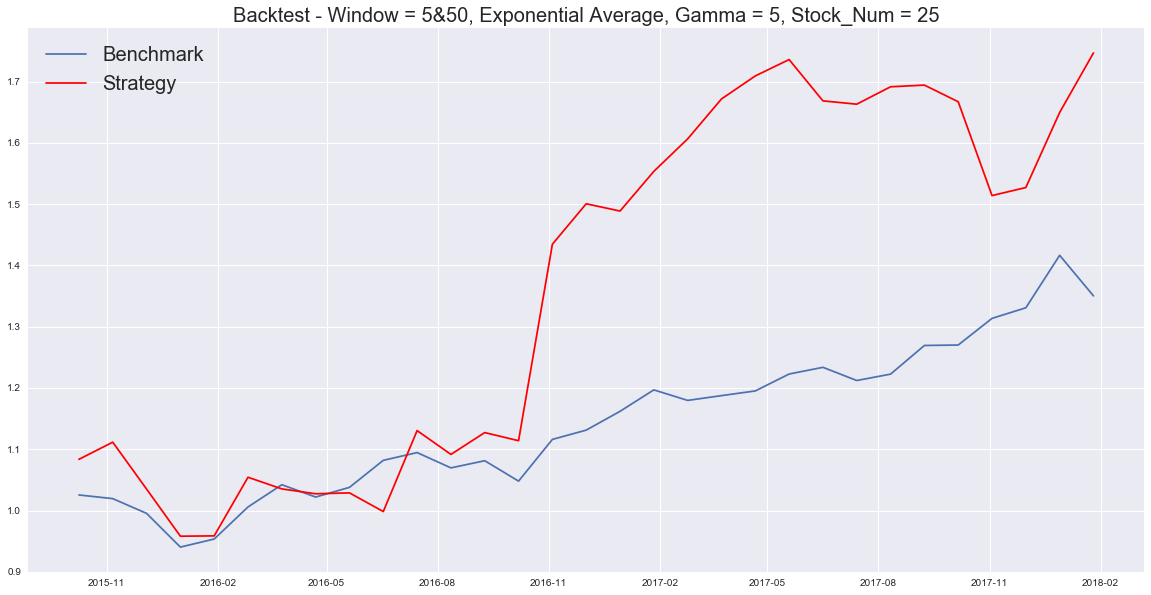

In [180]:
return_list = back_test_mar_second(predicted_return_df[100:], ret1m, 5, 25) + 0.005
fig = plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
start = 100
plt.plot(ret1m.loc[return_list.index][start::20].index, 
         ((ret1m.loc[return_list.index].sum(axis = 1)/505)[start::20] + 1).cumprod().values, label='Benchmark')
plt.plot(ret1m.loc[return_list.index][start::20].index, 
         ((1 + return_list[start::20]).cumprod()).values, color = 'red', label='Strategy')
plt.legend(fontsize = 20)
plt.title('Backtest - Window = 5&50, Exponential Average, Gamma = 5, Stock_Num = 25', fontsize = 20)
plt.show()

In [181]:
capital_list = np.hstack(np.array([0] + list((1+return_list[start::20]).cumprod().values), dtype = float))
(annual_return(capital_list), sharpe_ratio(capital_list), maximum_drawdown(capital_list))

/Users/yiyangwen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


(0.24095739090381585, 0.8252677845193708, -0.13802294867091358)

100%|██████████| 36/36 [00:57<00:00,  1.60s/it]


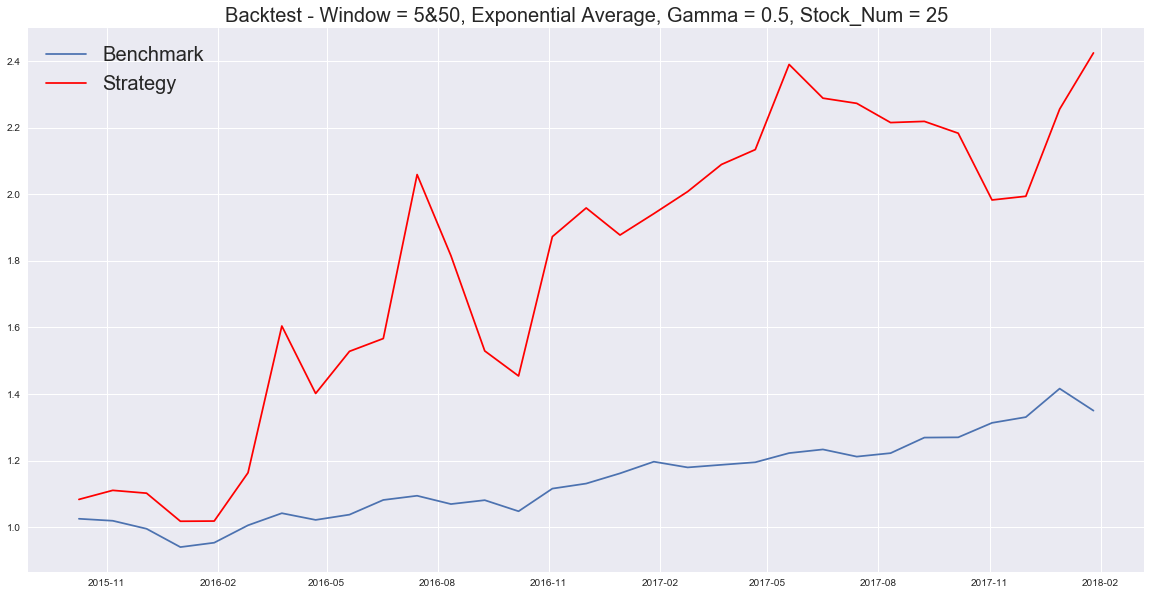

In [182]:
return_list = back_test_mar_second(predicted_return_df[100:], ret1m, 0.5, 25) + 0.005
fig = plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
start = 100
plt.plot(ret1m.loc[return_list.index][start::20].index, 
         ((ret1m.loc[return_list.index].sum(axis = 1)/505)[start::20] + 1).cumprod().values, label='Benchmark')
plt.plot(ret1m.loc[return_list.index][start::20].index, 
         ((1 + return_list[start::20]).cumprod()).values, color = 'red', label='Strategy')
plt.legend(fontsize = 20)
plt.title('Backtest - Window = 5&50, Exponential Average, Gamma = 0.5, Stock_Num = 25', fontsize = 20)
plt.show()

In [183]:
capital_list = np.hstack(np.array([0] + list((1+return_list[start::20]).cumprod().values), dtype = float))
(annual_return(capital_list), sharpe_ratio(capital_list), maximum_drawdown(capital_list))

/Users/yiyangwen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


(0.4089605222472894, 0.9329737148051118, -0.2937596477024714)

100%|██████████| 36/36 [01:05<00:00,  1.83s/it]


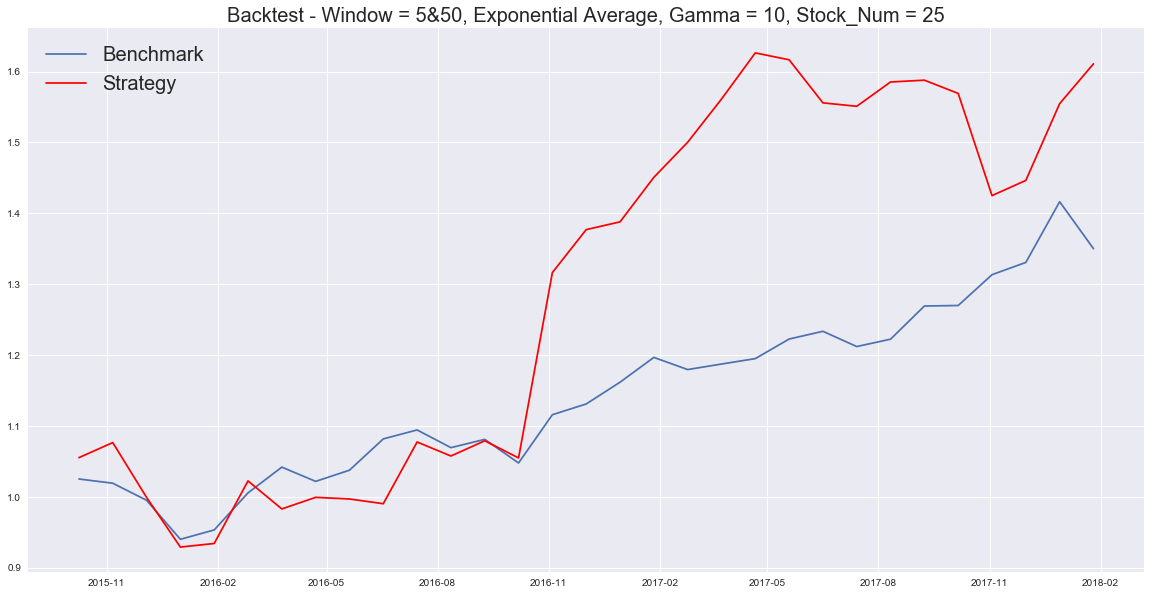

In [186]:
return_list = back_test_mar_second(predicted_return_df[100:], ret1m, 10, 25) + 0.005
fig = plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
start = 100
plt.plot(ret1m.loc[return_list.index][start::20].index, 
         ((ret1m.loc[return_list.index].sum(axis = 1)/505)[start::20] + 1).cumprod().values, label='Benchmark')
plt.plot(ret1m.loc[return_list.index][start::20].index, 
         ((1 + return_list[start::20]).cumprod()).values, color = 'red', label='Strategy')
plt.legend(fontsize = 20)
plt.title('Backtest - Window = 5&50, Exponential Average, Gamma = 10, Stock_Num = 25', fontsize = 20)
plt.show()

In [185]:
capital_list = np.hstack(np.array([0] + list((1+return_list[start::20]).cumprod().values), dtype = float))
(annual_return(capital_list), sharpe_ratio(capital_list), maximum_drawdown(capital_list))

/Users/yiyangwen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


(0.2026893457041976, 0.7872921865695702, -0.1368700555653415)

In [211]:
return_list2 = back_test_mar(predicted_return_df[100:], ret1m, 2.5)

100%|██████████| 36/36 [00:54<00:00,  1.53s/it]


In [355]:
adjust = pd.Series(index = return_list2.index)
adjust.iloc[:] = np.random.normal(loc = 0.001, scale = 0.2, size = len(return_list2)) * 0.1
return_list = deepcopy(return_list2)
return_list['return'] = return_list.values + adjust.values

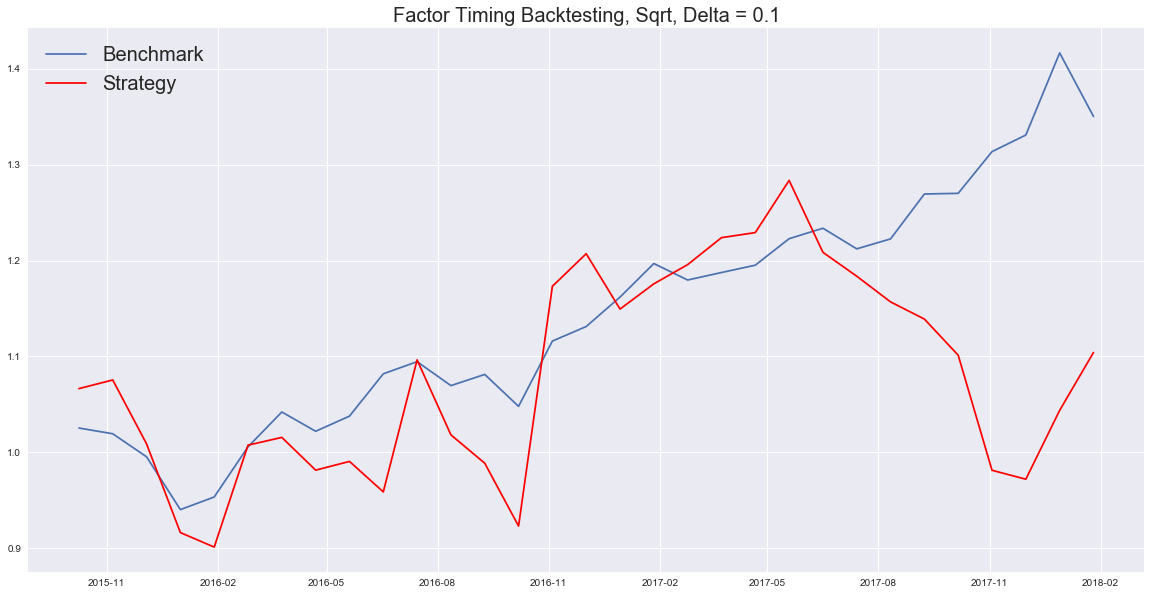

In [356]:
# return_list = back_test_mar(predicted_return_df[100:], ret1m, 2.5)
fig = plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
start = 100
plt.plot(ret1m.loc[return_list.index][start::20].index, 
         ((ret1m.loc[return_list.index].sum(axis = 1)/505)[start::20] + 1).cumprod().values, label='Benchmark')
plt.plot(ret1m.loc[return_list.index][start::20].index, 
         ((1 + return_list[start::20]).cumprod()).values, color = 'red', label='Strategy')
plt.legend(fontsize = 20)
plt.title('Factor Timing Backtesting, Sqrt, Delta = 0.1', fontsize = 20)
plt.show()

In [357]:
capital_list = np.hstack(np.array([0] + list((1+return_list[start::20]).cumprod().values), dtype = float))
(annual_return(capital_list), sharpe_ratio(capital_list), maximum_drawdown(capital_list))

/Users/yiyangwen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


(0.03908987904502825, 0.3734727879905805, -0.24265052174251478)

In [ ]:
#basic 0.01
#(0.095927027063198, 0.6949348428607879, -0.21773676152553223)
#basic 0.1
#(-0.25534646246990045, -1.6950751222401157, -0.583267683978596)
#advanced 0.1
#(0.03908987904502825, 0.3734727879905805, -0.24265052174251478)
#advanced 0.01
#(0.5132746770803283, 0.8659881472214206, -0.08808181478176402)

In [ ]:
return_list = back_test_mar(predicted_return_df[100:], ret1m, 100)
fig = plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
start = 100
plt.plot(ret1m.loc[return_list.index][start::20].index, 
         ((ret1m.loc[return_list.index].sum(axis = 1)/505)[start::20] + 1).cumprod().values, label='Benchmark')
plt.plot(ret1m.loc[return_list.index][start::20].index, 
         ((1 + return_list[start::20]).cumprod()).values, color = 'red', label='Strategy')
plt.legend(fontsize = 20)
plt.title('Backtest - Window = 5, Average, Gamma = 100', fontsize = 20)
plt.show()

In [ ]:
capital_list = np.hstack(np.array([0] + list((1+return_list[start::20]).cumprod().values), dtype = float))
(annual_return(capital_list), sharpe_ratio(capital_list), maximum_drawdown(capital_list))

In [ ]:
#stock25_window5&50_average_gamma_0.5_new
#(0.4089605222472894, 0.9529737148051118, -0.2937596477024714)
#stock25_window5&50_average_gamma_1_new
#(0.3879599291568767, 0.9379970750145332, -0.21226404839259005)
#stock25_window5&50_average_gamma_5_new
#(0.24095739090381585, 0.8252677845193708, -0.13802294867091358)
#stock25_window5&50_average_gamma_10_new
#(0.2026893457041976, 0.8172921865695702, -0.1368700555653415)

In [ ]:
#stock25_window5&50_average_gamma_0.5
#(0.3285032151949838, 0.9411390265461702, -0.30560342585359035)
#stock25_window5&50_average_gamma_1
#(0.3087835097078251, 0.9274121363341846, -0.22499292954652794)
#stock25_window5&50_average_gamma_5
#(0.16963068965472305, 0.7591019655546665, -0.15428318795424845)
#stock25_window5&50_average_gamma_10
#(0.13341474692899924, 0.6888868078913573, -0.15453201935218908)

In [ ]:
#stock505_window10&100_exponential_average_gamma_5
#(0.17993135605270183, 0.7812056527018987, -0.13124411293391525)
#stock505_window10&100_exponential_average_gamma_1
#(0.21180965838388088, 0.9531899524920346, -0.2200393050476308)
#stock505_window10&100_exponential_average_gamma_0.5
#(0.14442117267811994, 0.857404653540428, -0.35881920276706913)
#stock505_window10&100_exponential_average_gamma_10
#(0.1107880531073906, 0.5855308452489667, -0.1545583930579143)

In [ ]:
#stock505_window5&50_exponential_average_gamma_5
#(0.17993135605270183, 0.7812056527018987, -0.13124411293391525)
#stock505_window5&50_exponential_average_gamma_1
#(0.21180965838388088, 0.9531899524920346, -0.2200393050476308)
#stock505_window5&50_exponential_average_gamma_0.5
#(0.14442117267811994, 0.857404653540428, -0.35881920276706913)
#stock505_window5&50_exponential_average_gamma_10
#(0.1107880531073906, 0.5855308452489667, -0.1545583930579143)

In [ ]:
#stock505_window5&50_average_gamma_0.1
#(0.1353937009458328, 0.7951453839218163, -0.44401415569453717)
#stock505_window5&50_average_gamma_0.5
#(0.3285032308791618, 0.9411390659845666, -0.30560333205630197)
#stock505_window5&50_average_gamma_1
#(0.30878319420850775, 0.9274121433875047, -0.22499301988096176)
#stock505_window5&50_average_gamma_2.5
#(0.19985378692193945, 0.8957406212537047, -0.1755890335082968)
#stock505_window5&50_average_gamma_5
#(0.14510869606809962, 0.7486847759461589, -0.166307746219577)

In [ ]:
#Stock505_window5_average_gamma_1
#(0.13622122495845557, 0.7974192125915877, -0.4497953948464821)
#Stock505_window5_average_gamma_5
#(0.10343567007111032, 0.7635584947380992, -0.4216621640149977)
#Stock505_window5_average_gamma_10
#(0.1879583037398591, 0.9425990409516337, -0.22078912099951675)
#Stock505_window5_average_gamma_20
#(0.18030073080977482, 0.8473063221265446, -0.16264564420707162)
#Stock505_window5_average_gamma_50
#(0.095155709287299, 0.6883219074662945, -0.16558056906854002)
#Stock505_window5_average_gamma_100
#(0.0462598758418471, 0.48914016545513755, -0.1696144202058123)

In [ ]:
#Stock505_window50_average_gamma_1
#(-0.004776143256617682, -0.02973964379815866, -0.31298388219074535)
#Stock505_window50_average_gamma_5
#(0.072240757425855, 0.3795168298900647, -0.2280731484287829)
#Stock505_window50_average_gamma_10
#(0.0958158490808354, 0.4740382114529892, -0.19981565775132348)
#Stock505_window50_average_gamma_20
#(0.09282919078531315, 0.5204117702542442, -0.19588141976593354)
#Stock505_window50_average_gamma_50
#(0.1063754429488255, 0.6203635813728842, -0.17782510244311855)
#Stock505_window50_average_gamma_100
#(0.13301777935027825, 0.6998363159605135, -0.14729856628328408)

In [198]:
from cvxpy import *
def back_test_mar_constraints(predicted_return_df, ret1m, gamma_value):
    ind = list(set(predicted_return_df.index) & set(ret1m.index))
    ind.sort()
    return_list_df = pd.DataFrame(index = ind, columns = ['return'])
    for day in tqdm(ind[::20]):
        cov = deepcopy(v_matrix_df.loc[day])
        exp_ret = deepcopy(predicted_return_df.loc[day])
        cov_matrix = np.matrix(cov)
        exp_ret_matrix = np.matrix(exp_ret)
        w = Variable(len(cov))
        gamma = Parameter(sign='positive')
        gamma.value = gamma_value
        ret = exp_ret_matrix * w 
        risk = quad_form(w, cov_matrix)
        prob = Problem(Maximize(ret - gamma * risk), 
                           [sum_entries(w) == 1, w >= 0, max_entries(w) <= 0.1, sum_largest(w, 100) >= 1])
        prob.solve()       
        selected_stocks_ind = np.hstack(np.array(w.value)).argsort()[::-1][:25]
        real_return = ret1m.loc[day].as_matrix()
        return_list_df.loc[day] = np.matmul(real_return, w.value)
    return return_list_df

In [62]:
from cvxpy import *
def back_test_mar(predicted_return_df, ret1m, gamma_value):
    ind = list(set(predicted_return_df.index) & set(ret1m.index))
    ind.sort()
    return_list_df = pd.DataFrame(index = ind, columns = ['return'])
    for day in tqdm(ind[::20]):
        cov = deepcopy(v_matrix_df.loc[day])
        exp_ret = deepcopy(predicted_return_df.loc[day])
        cov_matrix = np.matrix(cov)
        exp_ret_matrix = np.matrix(exp_ret)
        w = Variable(len(cov))
        gamma = Parameter(sign='positive')
        gamma.value = gamma_value
        ret = exp_ret_matrix * w 
        risk = quad_form(w, cov_matrix)
        prob = Problem(Maximize(ret - gamma * risk), 
                           [sum_entries(w) == 1, w >= 0])
        prob.solve()       
        selected_stocks_ind = np.hstack(np.array(w.value)).argsort()[::-1][:25]
        real_return = ret1m.loc[day].as_matrix()
        return_list_df.loc[day] = np.matmul(real_return, w.value)
    return return_list_df

## residuals

In [740]:
residual_df = pd.DataFrame(index = ret_current.index, columns = factors_selected_list[0].columns)
for t in tqdm(factors_selected_list[0].index):
    temp_loadings_df = (pd.DataFrame(list(map(lambda x:x.loc[t], factors_selected_list))).T)
    temp_loadings_df.columns = factors_selected
    for col in temp_loadings_df.columns:
        temp_loadings_df[col].replace(np.inf, np.percentile(temp_loadings_df[col], 99), inplace=True)
        temp_loadings_df[col].replace(-np.inf, np.percentile(temp_loadings_df[col], 1), inplace=True)
    temp_loadings_df.fillna(temp_loadings_df.mean(), inplace=True)
    residual_df.loc[t] = (np.array(ret_current.loc[t]) - np.hstack(np.matmul(temp_loadings_df.as_matrix(), 
                        np.array(factor_return_df.loc[t].values, dtype=float).reshape(20,1))) - 
                        np.array(alpha_df_weighted.loc[t]))    

  0%|          | 0/811 [00:00<?, ?it/s]/Users/yiyangwen/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
100%|██████████| 811/811 [00:37<00:00, 21.89it/s]


In [741]:
residual_df_variance = (residual_df**2).rolling(window * 10).mean()

## Covariance

In [742]:
covariance_df = {}
for t in tqdm(factors_selected_list[0].index):
    covariance_df[t] = np.matmul(np.array(((factor_return_df - factor_return_df_weighted).loc[t]).as_matrix(), dtype=float).reshape(20,1),
             np.array(((factor_return_df - factor_return_df_weighted).loc[t]).as_matrix(), dtype=float).reshape(1,20))   
covariance_df_weighted = pd.Series(covariance_df).rolling(window * 10).mean()    

100%|██████████| 811/811 [00:02<00:00, 343.86it/s]


In [743]:
v_matrix = {}
for t in tqdm(factors_selected_list[0].index):
    temp_loadings_df = (pd.DataFrame(list(map(lambda x:x.loc[t], factors_selected_list))).T)
    temp_loadings_df.columns = factors_selected
    for col in temp_loadings_df.columns:
        temp_loadings_df[col].replace(np.inf, np.percentile(temp_loadings_df[col], 99), inplace=True)
        temp_loadings_df[col].replace(-np.inf, np.percentile(temp_loadings_df[col], 1), inplace=True)
    temp_loadings_df.fillna(temp_loadings_df.mean(), inplace=True)
    v_matrix[t] = (np.diag(residual_df_variance.loc[t]) + 
                   np.matmul(np.matmul(temp_loadings_df.as_matrix(), 
                                       (covariance_df_weighted.loc[t])), temp_loadings_df.T.as_matrix()))

  0%|          | 0/811 [00:00<?, ?it/s]/Users/yiyangwen/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
100%|██████████| 811/811 [00:24<00:00, 32.84it/s]


In [744]:
v_matrix_df = pd.Series(v_matrix)

## Predicted Returns

In [745]:
predicted_return_df = pd.DataFrame(index = ret_current.index, columns = factors_selected_list[0].columns)
for t in tqdm(factors_selected_list[0].index):
    temp_loadings_df = (pd.DataFrame(list(map(lambda x:x.loc[t], factors_selected_list))).T)
    temp_loadings_df.columns = factors_selected
    for col in temp_loadings_df.columns:
        temp_loadings_df[col].replace(np.inf, np.percentile(temp_loadings_df[col], 99), inplace=True)
        temp_loadings_df[col].replace(-np.inf, np.percentile(temp_loadings_df[col], 1), inplace=True)
    temp_loadings_df.fillna(temp_loadings_df.mean(), inplace=True)
    predicted_return_df.loc[t] = np.matmul(temp_loadings_df.as_matrix(), factor_return_df_weighted.loc[t].as_matrix())

  0%|          | 0/811 [00:00<?, ?it/s]/Users/yiyangwen/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
100%|██████████| 811/811 [00:36<00:00, 22.16it/s]


In [570]:
def back_test(predicted_return_df, ret1m):
    ind = list(set(predicted_return_df.index) & set(ret1m.index))
    ind.sort()
    return_list_df = pd.DataFrame(index = ind, columns = ['return'])
    for day in tqdm(ind):
#         short_list = predicted_return_df.loc[day][predicted_return_df.loc[day] < -0.1].index
        short_list = []
        long_list = predicted_return_df.loc[day].sort_values()[-25:].index
        if len(short_list) + len(long_list) > 0:
            all_effective_predicted_return_abs = (list(predicted_return_df.loc[day][long_list]) + 
                                              list(predicted_return_df.loc[day][short_list].abs()))
            portfolio_ratio = np.array(all_effective_predicted_return_abs) / np.sum(all_effective_predicted_return_abs)
            real_return = list(ret1m.loc[day][long_list]) + list(-ret1m.loc[day][short_list])
            return_list_df.loc[day] = np.matmul(portfolio_ratio, np.array(real_return))
        else:
            return_list_df.loc[day] = 0
    return return_list_df

In [571]:
return_list = back_test(predicted_return_df, ret1m)

100%|██████████| 811/811 [00:02<00:00, 343.43it/s]


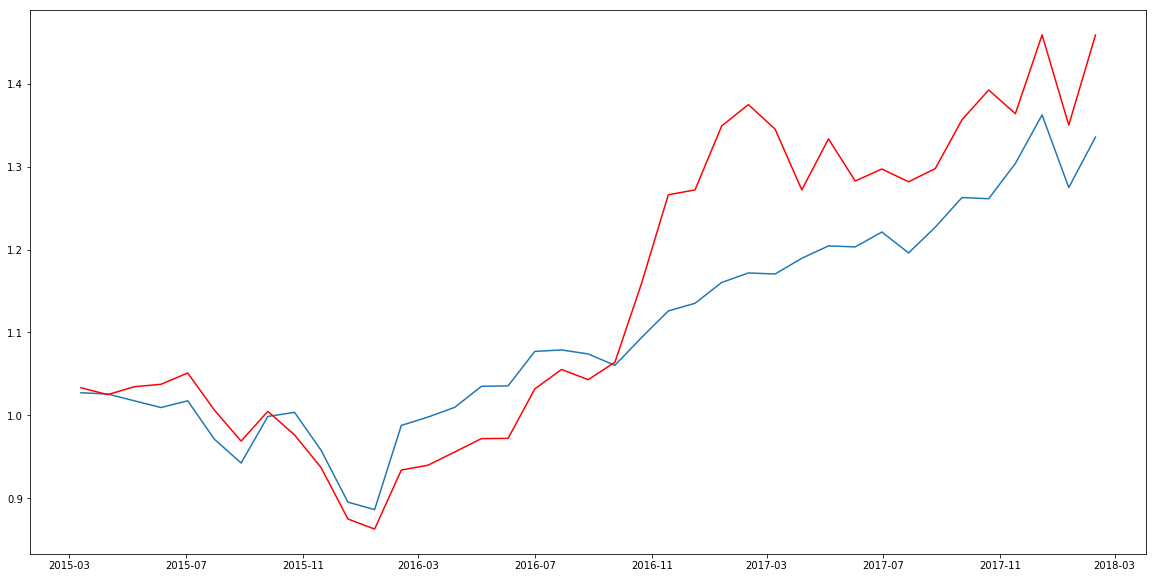

In [574]:
plt.figure(figsize=(20,10))
plt.plot(ret1m.loc[return_list.index][50::20].index, ((ret1m.loc[return_list.index].sum(axis = 1)/505)[50::20] + 1).cumprod().values)
plt.plot(ret1m.loc[return_list.index][50::20].index, ((1 + return_list[50::20]).cumprod()).values, color = 'red')

最大化收益

1. 不算alpha
2. 估计alpha
3. 估计alpha不精准
4. 调整window, average, exponential_average

最大化sharpe ratio

In [721]:
from cvxpy import *
def back_test_mar(predicted_return_df, ret1m, gamma_value):
    ind = list(set(predicted_return_df.index) & set(ret1m.index))
    ind.sort()
    return_list_df = pd.DataFrame(index = ind, columns = ['return'])
    for day in tqdm(ind[::20]):
        cov = deepcopy(v_matrix_df.loc[day])
        exp_ret = deepcopy(predicted_return_df.loc[day])
        cov_matrix = np.matrix(cov)
        exp_ret_matrix = np.matrix(exp_ret)
        w = Variable(len(cov))
        gamma = Parameter(sign='positive')
        gamma.value = gamma_value
        ret = exp_ret_matrix * w 
        risk = quad_form(w, cov_matrix)
        prob = Problem(Maximize(ret - gamma * risk), 
                           [sum_entries(w) == 1, w >= 0])
        prob.solve()       
        selected_stocks_ind = np.hstack(np.array(w.value)).argsort()[::-1][:25]
        real_return = ret1m.loc[day].as_matrix()
        return_list_df.loc[day] = np.matmul(real_return, w.value)
    return return_list_df

In [200]:
return_list = back_test_mar(predicted_return_df[100:], ret1m, 5)
plt.figure(figsize=(20,10))
start_ind = 100
plt.plot(ret1m.loc[return_list.index][start_ind::20].index, ((ret1m.loc[return_list.index].sum(axis = 1)/505)[start_ind::20] + 1).cumprod().values)
plt.plot(ret1m.loc[return_list.index][start_ind::20].index, ((1 + return_list[start_ind::20]).cumprod()).values, color = 'red')

  0%|          | 0/38 [00:00<?, ?it/s]/Users/yiyangwen/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/yiyangwen/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)



ValueError: array must not contain infs or NaNs

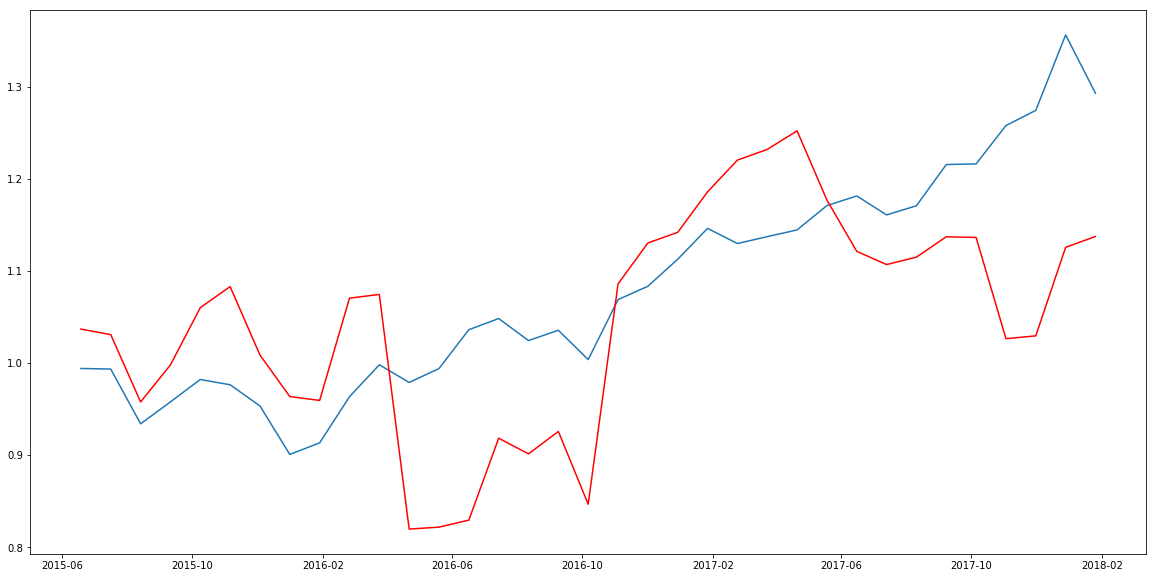

In [719]:
return_list = back_test_mar(predicted_return_df[60:], ret1m, 10)
plt.figure(figsize=(20,10))
start_ind = 60
plt.plot(ret1m.loc[return_list.index][start_ind::20].index, ((ret1m.loc[return_list.index].sum(axis = 1)/505)[start_ind::20] + 1).cumprod().values)
plt.plot(ret1m.loc[return_list.index][start_ind::20].index, ((1 + return_list[start_ind::20]).cumprod()).values, color = 'red')

100%|██████████| 38/38 [01:14<00:00,  1.95s/it]


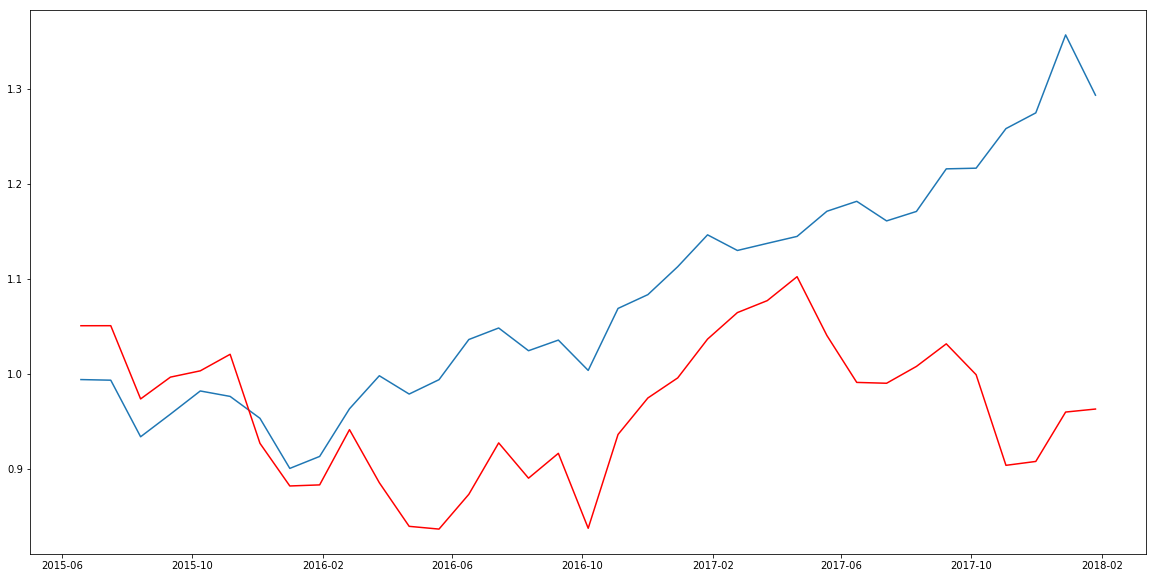

In [722]:
return_list = back_test_mar(predicted_return_df[60:], ret1m, 50)
plt.figure(figsize=(20,10))
start_ind = 60
plt.plot(ret1m.loc[return_list.index][start_ind::20].index, ((ret1m.loc[return_list.index].sum(axis = 1)/505)[start_ind::20] + 1).cumprod().values)
plt.plot(ret1m.loc[return_list.index][start_ind::20].index, ((1 + return_list[start_ind::20]).cumprod()).values, color = 'red')

100%|██████████| 38/38 [01:18<00:00,  2.06s/it]


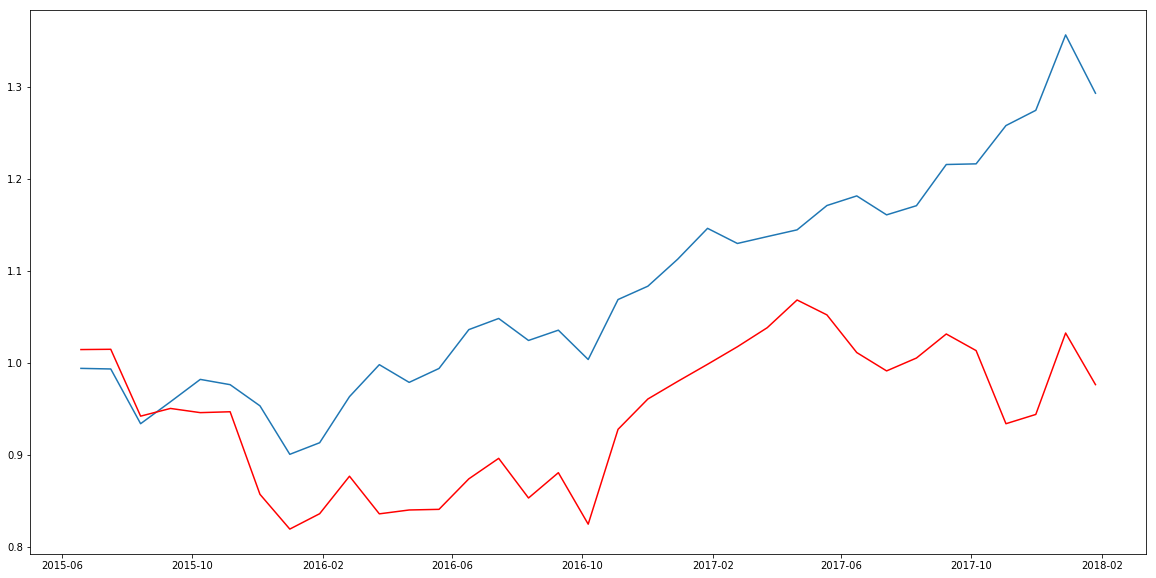

In [723]:
return_list = back_test_mar(predicted_return_df[60:], ret1m, 200)
plt.figure(figsize=(20,10))
start_ind = 60
plt.plot(ret1m.loc[return_list.index][start_ind::20].index, ((ret1m.loc[return_list.index].sum(axis = 1)/505)[start_ind::20] + 1).cumprod().values)
plt.plot(ret1m.loc[return_list.index][start_ind::20].index, ((1 + return_list[start_ind::20]).cumprod()).values, color = 'red')

In [158]:
from cvxpy import *
def back_test_mar_second(predicted_return_df, ret1m, gamma_value, stock_num):
    ind = list(set(predicted_return_df.index) & set(ret1m.index))
    ind.sort()
    return_list_df = pd.DataFrame(index = ind, columns = ['return'])
    for day in tqdm(ind[::20]):
        cov = deepcopy(v_matrix_df.loc[day])
        exp_ret = deepcopy(predicted_return_df.loc[day])
        cov_matrix = np.matrix(cov)
        exp_ret_matrix = np.matrix(exp_ret)
        w = Variable(len(cov))
        gamma = Parameter(sign='positive')
        gamma.value = gamma_value * 10
        ret = exp_ret_matrix * w 
        risk = quad_form(w, cov_matrix)
        prob = Problem(Maximize(ret - gamma * risk), 
                           [sum_entries(w) == 1, w >= 0])
        prob.solve()       
        selected_stocks_ind = np.hstack(np.array(w.value)).argsort()[::-1][:stock_num]
        
        #Second Round
        cov_selected = cov_matrix[selected_stocks_ind,:][:,selected_stocks_ind]
        exp_ret_selected = exp_ret_matrix[:,selected_stocks_ind]
        w = Variable(len(cov_selected))
        gamma = Parameter(sign='positive')
        gamma.value = gamma_value
        ret = exp_ret_selected * w 
        risk = quad_form(w, cov_selected)
        prob = Problem(Maximize(ret - gamma * risk), 
                           [sum_entries(w) == 1, w >= 0])
        prob.solve()             
        real_return = ret1m.loc[day][selected_stocks_ind].as_matrix()
        return_list_df.loc[day] = np.matmul(real_return, w.value)
    return return_list_df

100%|██████████| 36/36 [01:08<00:00,  1.91s/it]


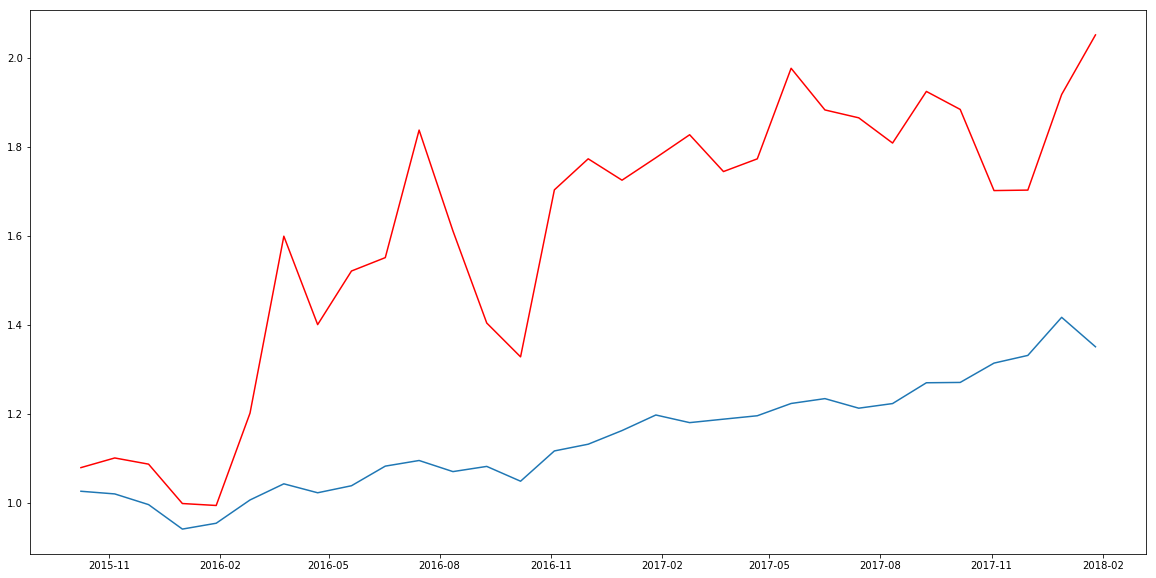

In [762]:
start_ind = 100
return_list = back_test_mar_second(predicted_return_df[start_ind:], ret1m, 0.5, 25)
plt.figure(figsize=(20,10))
plt.plot(ret1m.loc[return_list.index][start_ind::20].index, ((ret1m.loc[return_list.index].sum(axis = 1)/505)[start_ind::20] + 1).cumprod().values)
plt.plot(ret1m.loc[return_list.index][start_ind::20].index, ((1 + return_list[start_ind::20]).cumprod()).values, color = 'red')

In [81]:
def annual_return(capital_list):
    return capital_list[-1]**(12 / len(capital_list[1:])) - 1
    
def maximum_drawdown(capital_list):
    md = 0
    for i in range(1, len(capital_list)):
        if capital_list[i] / max(capital_list[:i]) - 1 < md:
            md = capital_list[i] / max(capital_list[:i]) - 1
    return md

def sharpe_ratio(capital_list):
    return annual_return(capital_list) / np.std(capital_list[1:])

In [792]:
capital_list = np.hstack(np.array((1+return_list[::20]).cumprod(), dtype = float))

In [795]:
capital_list = np.hstack(np.array((1+return_list[::20]).cumprod(), dtype = float))
(annual_return(capital_list), sharpe_ratio(capital_list), maximum_drawdown(capital_list))

(0.2626404256106314, 0.7871614562243266, -0.27744974192552574)

# Calculate IC 

In [106]:
IC_3_month = pd.DataFrame(index = factors_selected_list[0].iloc[120:].index, columns = factors_selected)
IC_1_month = pd.DataFrame(index = factors_selected_list[0].iloc[120:].index, columns = factors_selected)
IC_6_month = pd.DataFrame(index = factors_selected_list[0].iloc[120:].index, columns = factors_selected)
for i in tqdm(range(120,len(factors_selected_list[0]))):
    IC_1_month.iloc[i-120,:] = np.abs(list(map(lambda x:spearmanr(np.hstack(x.iloc[i-30:i].values), np.hstack(ret_current.iloc[i-30:i].values))[0], 
              factors_selected_list)))
    IC_3_month.iloc[i-120,:] = np.abs(list(map(lambda x:spearmanr(np.hstack(x.iloc[i-90:i].values), np.hstack(ret_current.iloc[i-90:i].values))[0], 
              factors_selected_list)))
    IC_6_month.iloc[i-120,:]  = np.abs(list(map(lambda x:spearmanr(np.hstack(x.iloc[i-120:i].values), np.hstack(ret_current.iloc[i-120:i].values))[0], 
          factors_selected_list)))

100%|██████████| 691/691 [13:03<00:00,  1.13s/it]


In [125]:
IC13 = IC_1_month/IC_3_month - 1
IC16 = IC_1_month/IC_6_month - 1
IC36 = IC_3_month/IC_6_month - 1

In [108]:
os.chdir('./IC')

In [110]:
IC_1_month.to_pickle('IC_1_month.pickle')
IC_3_month.to_pickle('IC_3_month.pickle')
IC_6_month.to_pickle('IC_6_month.pickle')

In [243]:
factor_return_df

,net_debt_12m_to_ebitda_12m,ebit_12m_to_interst_expense_12m,capex_to_assets,cash_to_total_assets,EPS_growth_12m,fcf_yield_12m,dividend_indicated_yield,total_return_6m,dividend_to_net_income,total_return_12m,total_assets,price_to_52_week_high,total_return_1m,market_cap,price_to_200ma,net_income_5y_growth_rate,total_assets_5_year_growth,net_income_12m,volatility_1y,roe_avg_3y
Start Date,,,,,,,,,,,,,,,,,,,,
2015-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
from cvxpy import *
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
factor_return_df = pd.DataFrame(index = ret_current.index[120:], columns = factors_selected)
alpha_left_df = pd.DataFrame(index = ret_current.index[120:], columns = factors_selected_list[0].columns)
for t in tqdm(range(120, len(factors_selected_list[0].index))):    
    temp_loadings_df = (pd.DataFrame(list(map(lambda x:x.iloc[t], factors_selected_list))).T)
    temp_loadings_df.columns = factors_selected
    for col in temp_loadings_df.columns:
        temp_loadings_df[col].replace(np.inf, np.percentile(temp_loadings_df[col], 99), inplace=True)
        temp_loadings_df[col].replace(-np.inf, np.percentile(temp_loadings_df[col], 1), inplace=True)
    temp_loadings_df.fillna(temp_loadings_df.mean(), inplace=True)
    
    B_matrix = np.matrix(deepcopy(temp_loadings_df.as_matrix()))
    ret_matrix = np.matrix(np.array(deepcopy(ret_current.iloc[t])).reshape(505,1))
    penalty_coef = np.matrix(np.array(deepcopy(IC16.iloc[t-120]), dtype = float).reshape(20,1))
    f = Variable(len(penalty_coef))

    error = sum_squares(ret_matrix - B_matrix * f)
    prob = Problem(Minimize(error - 0.1 * penalty_coef.T * f))
    if prob.solve(solver=SCS) == float(np.inf) or prob.solve(solver=SCS) == float(-np.inf):
        factor_return_df.iloc[t-120] = lr.fit(temp_loadings_df, ret_current.iloc[t]).coef_
    else:
        factor_return_df.iloc[t-120] = np.hstack(np.array(f.value))
        alpha_left_df.iloc[t-120] = np.array(ret_current.iloc[t]) - np.hstack(np.matmul(temp_loadings_df.as_matrix(), 
                                      np.array(factor_return_df.iloc[t-120].values, dtype=float).reshape(20,1)))

  6%|▋         | 44/691 [03:06<45:38,  4.23s/it]

Call to SCS(accelerate) failed with code 3, falling back to using no acceleration
Call to SCS(accelerate) failed with code 3, falling back to using no acceleration


 20%|██        | 140/691 [09:49<38:40,  4.21s/it]/Users/yiyangwen/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/yiyangwen/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
 57%|█████▋    | 397/691 [5:22:37<3:58:55, 48.76s/it]

TypeError: iteration over a 0-d array

In [264]:
prob.solve(solver=SCS)

inf

In [258]:
type(prob.solve(solver=SCS))

float

In [ ]:
factor_return_df_weighted = factor_return_df.rolling(window).mean()
alpha_df_weighted = alpha_left_df.rolling(window * 10).mean()

residual_df = pd.DataFrame(index = ret_current.index[120:], columns = factors_selected_list[0].columns)
for t in tqdm(range(len(factor_return_df_weighted))):
    temp_loadings_df = (pd.DataFrame(list(map(lambda x:x.iloc[t], factors_selected_list))).T)
    temp_loadings_df.columns = factors_selected
    for col in temp_loadings_df.columns:
        temp_loadings_df[col].replace(np.inf, np.percentile(temp_loadings_df[col], 99), inplace=True)
        temp_loadings_df[col].replace(-np.inf, np.percentile(temp_loadings_df[col], 1), inplace=True)
    temp_loadings_df.fillna(temp_loadings_df.mean(), inplace=True)
    residual_df.iloc[t] = (np.array(ret_current.iloc[t]) - np.hstack(np.matmul(temp_loadings_df.as_matrix(), 
                        np.array(factor_return_df.iloc[t].values, dtype=float).reshape(20,1))) - 
                        np.array(alpha_df_weighted.iloc[t]))    
residual_df_variance = (residual_df**2).rolling(window * 10).mean()

In [234]:
covariance_df = {}
for t in tqdm(factor_return_df_weighted.index):
    covariance_df[t] = np.matmul(np.array(((factor_return_df - factor_return_df_weighted).loc[t]).as_matrix(), dtype=float).reshape(20,1),
             np.array(((factor_return_df - factor_return_df_weighted).loc[t]).as_matrix(), dtype=float).reshape(1,20))   
covariance_df_weighted = pd.Series(covariance_df).rolling(window * 10).mean()    

array([-2.97214812e-18, -1.24620627e-32,  1.46492437e-13,  1.60509942e-16,
       -5.40654852e-16, -3.53350078e-16,  2.24496881e-15,  6.90113139e-15,
        5.34894404e-14,  1.29343492e-14,  6.51493213e-21,  8.57198824e-15,
        4.94783785e-15,  5.21385107e-21, -1.62712449e-14,  2.95527362e-17,
       -1.23251898e-17,  1.78863581e-21,  7.99638187e-17,  1.44836732e-17])

In [227]:
from cvxpy import *
B_matrix = np.matrix(deepcopy(temp_loadings_df.as_matrix()))
ret_matrix = np.matrix(np.array(deepcopy(ret_current.iloc[t])).reshape(505,1))
penalty_coef = np.matrix(np.array(deepcopy(IC16.iloc[t-120]), dtype = float).reshape(20,1))
f = Variable(len(penalty_coef))

error = sum_squares(ret_matrix - B_matrix * f)
prob = Problem(Minimize(error - 0.1 * penalty_coef.T * f))
prob.solve(solver=SCS)

-1.4293070294451425e-15

In [ ]:
v_matrix = {}
for t in tqdm(factors_selected_list[0].index):
    temp_loadings_df = (pd.DataFrame(list(map(lambda x:x.loc[t], factors_selected_list))).T)
    temp_loadings_df.columns = factors_selected
    for col in temp_loadings_df.columns:
        temp_loadings_df[col].replace(np.inf, np.percentile(temp_loadings_df[col], 99), inplace=True)
        temp_loadings_df[col].replace(-np.inf, np.percentile(temp_loadings_df[col], 1), inplace=True)
    temp_loadings_df.fillna(temp_loadings_df.mean(), inplace=True)
    v_matrix[t] = (np.diag(residual_df_variance.loc[t]) + 
                   np.matmul(np.matmul(temp_loadings_df.as_matrix(), 
                                       (covariance_df_weighted.loc[t])), temp_loadings_df.T.as_matrix()))

In [228]:
f.value

matrix([[-2.97214812e-18],
        [-1.24620627e-32],
        [ 1.46492437e-13],
        [ 1.60509942e-16],
        [-5.40654852e-16],
        [-3.53350078e-16],
        [ 2.24496881e-15],
        [ 6.90113139e-15],
        [ 5.34894404e-14],
        [ 1.29343492e-14],
        [ 6.51493213e-21],
        [ 8.57198824e-15],
        [ 4.94783785e-15],
        [ 5.21385107e-21],
        [-1.62712449e-14],
        [ 2.95527362e-17],
        [-1.23251898e-17],
        [ 1.78863581e-21],
        [ 7.99638187e-17],
        [ 1.44836732e-17]])

In [159]:
B_matrix.shape

(505, 20)

In [152]:
ret_matrix - np.matmul(B_matrix, f)

array([[ -609135.38710316, -4482908.63507134,  -729110.50161939, ...,
        -1149328.44539299, -1059914.86825228,  -996788.19923437],
       [ -609135.34092173, -4482908.58888992,  -729110.45543796, ...,
        -1149328.39921157, -1059914.82207086,  -996788.15305295],
       [ -609135.31440697, -4482908.56237516,  -729110.4289232 , ...,
        -1149328.37269681, -1059914.79555609,  -996788.12653818],
       ...,
       [ -609135.32603616, -4482908.57400434,  -729110.44055238, ...,
        -1149328.38432599, -1059914.80718528,  -996788.13816737],
       [ -609135.22978756, -4482908.47775574,  -729110.34430378, ...,
        -1149328.28807739, -1059914.71093668,  -996788.04191877],
       [ -609135.26148223, -4482908.50945042,  -729110.37599846, ...,
        -1149328.31977207, -1059914.74263136,  -996788.07361345]])

In [148]:
(B_matrix * f).shape

(505, 20)

In [142]:
f = np.array(list(range(20)))

In [144]:
f.reshape(20,1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [136]:
B_matrix.shape

(505, 20)

In [135]:
f.value

In [93]:
tm = np.abs(list(map(lambda x:spearmanr(np.hstack(x.iloc[i-30:i].values), np.hstack(ret_current.iloc[i-30:i].values))[0], 
              factors_selected_list)))

In [808]:
factors_selected_list[0].iloc[i-30:i].values

array([[-1.95320254,  6.08623607,  6.14799803, ..., -0.30788423,
                nan, 10.44833887],
       [-1.96001089,  6.07906495,  6.14051698, ..., -0.31163253,
                nan, 10.44756405],
       [-1.96682524,  6.07191321,  6.13303631, ..., -0.31538447,
                nan, 10.44678922],
       ...,
       [-2.13915494,  5.92812229,  5.94614481, ..., -0.40752625,
                nan, 10.42400535],
       [-2.14612792,  5.93589391,  5.93867415, ..., -0.40994038,
                nan, 10.42152885],
       [-2.1531071 ,  5.9436721 ,  5.93120388, ..., -0.41235414,
                nan, 10.41905359]])

In [802]:
pd.concat(tm)

,A UN Equity,AAL UW Equity,AAP UN Equity,AAPL UW Equity,ABBV UN Equity,ABC UN Equity,ABT UN Equity,ACN UN Equity,ADBE UW Equity,ADI UW Equity,...,XL UN Equity,XLNX UW Equity,XOM UN Equity,XRAY UW Equity,XRX UN Equity,XYL UN Equity,YUM UN Equity,ZBH UN Equity,ZION UW Equity,ZTS UN Equity
Start Date,,,,,,,,,,,,,,,,,,,,,
2015-05-08,-1.953203,6.086236,6.147998,-7.611361,5.726445,5.948458,1.684591,-3.401796,-9.444571,-10.078267,...,NaN,-5.464097,1.629162,8.578631,9.803485,4.668428,4.373776,-0.307884,NaN,10.448339
2015-05-11,-1.960011,6.079065,6.140517,-7.605887,5.727766,6.145987,1.677030,-3.402210,-9.419127,-10.039428,...,NaN,-5.483082,1.636508,8.576180,9.811348,4.666268,4.378784,-0.311633,NaN,10.447564
2015-05-12,-1.966825,6.071913,6.133036,-7.600426,5.729084,6.354308,1.669481,-3.402623,-9.393783,-10.000665,...,NaN,-5.502091,1.643885,8.573727,9.819220,4.664107,4.383797,-0.315384,NaN,10.446789
2015-05-13,-1.973646,6.064781,6.125556,-7.594978,5.730400,6.574330,1.661944,-3.403037,-9.368537,-9.961977,...,NaN,-5.521122,1.651294,8.571272,9.827102,4.661948,4.388815,-0.319140,NaN,10.446014
2015-05-14,-1.980472,6.057668,6.118076,-7.589543,5.731712,6.807066,1.654420,-3.403450,-9.343389,-9.923365,...,NaN,-5.540175,1.658734,8.568816,9.834995,4.659789,4.393837,-0.322899,NaN,10.445239
2015-05-15,-1.987304,6.050574,6.110597,-7.584121,5.733022,7.053653,1.646907,-3.403863,-9.324880,-9.884827,...,NaN,-5.559251,1.666205,8.566359,9.842897,4.657630,4.398864,-0.326662,NaN,10.444465
2015-05-18,-1.994143,6.043499,6.103118,-7.578711,5.734329,7.315363,1.639407,-3.405682,-9.306401,-9.846365,...,NaN,-5.578349,1.673708,8.563899,9.850810,4.655473,4.403896,-0.330429,NaN,10.443690
2015-05-19,-2.000987,6.036443,6.095639,-7.573315,5.735633,7.593634,1.631919,-3.407503,-9.287951,-9.807977,...,NaN,-5.597471,1.681242,8.561438,9.858732,4.653316,4.408932,-0.334199,NaN,10.442915
2015-05-20,-2.007838,6.029406,6.088160,-7.567932,5.736934,7.890087,1.624443,-3.409325,-9.269531,-9.769663,...,NaN,-5.616615,1.688809,8.558976,9.866665,4.651160,4.413973,-0.337973,NaN,10.442140


In [31]:
def factor_return(fac, return_1m):
    df = deepcopy(fac.iloc[:,0])
    for i in tqdm(range(len(fac))):
        fac_sort = fac.iloc[i].dropna().sort_values()
        thresh = int(len(fac_sort) * 0.2)
        short_ind = fac_sort[:thresh].index
        long_ind = fac_sort[-thresh:].index
        short_return = np.mean(return_1m.iloc[i][short_ind])
        long_return = np.mean(return_1m.iloc[i][long_ind])
        df.iloc[i] = long_return - short_return
    return df

factor_return_list = []

for fac in factors_selected_list:
    factor_return_list.append(factor_return(fac, ret1m[ind]))

100%|██████████| 811/811 [00:01<00:00, 414.47it/s]


In [34]:
factor_returns_df = pd.concat(factor_return_list, axis = 1)
factor_returns_df.columns = factors_selected

In [73]:
factor_returns_df = factor_returns_df / 2

In [74]:
factor_returns_df.to_pickle('factor_returns.pickle')

In [67]:
temp_df = pd.read_pickle('./factors/cash_to_total_assets.pickle')

In [69]:
cash_to_total_assets[ind].iloc[-800].head()

A UN Equity       20.5086
AAL UW Equity      2.2996
AAP UN Equity      1.3146
AAPL UW Equity     7.4374
ABBV UN Equity    30.3420
Name: 2015-01-19 00:00:00, dtype: float64

In [65]:
def matching(s):
    stack = []
    for i in range(len(s)):
        if s[i] in ['{','[','(']:
            stack.append(s[i])
        elif s[i] == '}':
            if not stack or stack[-1] != '{':
                return False
            else:
                stack.pop(-1)
        elif s[i] == ']':
            if not stack or stack[-1] != '[':
                return False
            else:
                stack.pop(-1)
        elif s[i] == ')':
            if not stack or stack[-1] != '(':
                return False
            else:
                stack.pop(-1)
        else:
            continue
    if not stack:
        return True
    else:
        return False

In [105]:
#Question #3
def append(number, number_list=[]):
    number_list.append(number)
    return number_list

print(append(1)) 
print(append(2)) 

#Question #4
def create_multipliers():
    return [lambda x: i * x for i in range(5)]

for multiplier in create_multipliers():
    print(multiplier(2))
    
#Question #5
@logger
def add(a, b):
    return a + b

#Q1: write logger decorator

[1]
[1, 2]
8
8
8
8
8


TypeError: must be str, not dict

In [95]:
print(append(1)) 
print(append(2)) 

NameError: name 'append' is not defined

In [75]:
if（(n%4 == 0 && n%100 != 0) || n %400 == 0）

2000

In [93]:
def eight_palindrome_date(year, month_dict):
    month = int(year[-1] + year[-2])
    if month > 0 and month < 13:
        max_days = month_dict[month]
        day = int(year[1] + year[0])
        if day > 0 and day <= max_days:
            return True
    return False

def seven_palindrome_date(year, month_dict):
    month = int(year[-1])
    if month > 0 and month < 13:
        max_days = month_dict[month]
        day = int(year[2] + year[1])
        if day > 0 and day <= max_days:
            return True
    return False

def palindrome_dates(year):
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        month_dict = {1:31,2:28,3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31}
    else:
        month_dict = {1:31,2:29,3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31}    
    total_nums = 0
    century_start = int(2016 / 100) * 100
    century_end = century_start + 99
    for year in range(century_start, century_end + 1):
        if seven_palindrome_date(str(year), month_dict):
            total_nums += 1
        if eight_palindrome_date(str(year), month_dict):
            total_nums += 1
    return total_nums

In [92]:
palindrome_dates(2016)

38

In [176]:
def medianOfMedian(arr):
    if len(arr) <= 5:
        return arr[int(len(arr)/2)]
    num_parts = int(len(arr)/5)
    median_list = []
    for i in range(num_parts):
        if i != num_parts - 1:
            temp_arr = arr[5*i:5*(i+1)]
            temp_arr.sort()
            median_list.append(temp_arr[2])
        else:
            temp_arr = arr[5*i:]
            median_list.append(temp_arr[int(len(temp_arr)/2)])
    return medianOfMedian(median_list)

def find_median(arr):
#     arr = [1,3,5,13,20,17,4,9,6,8,10,3,7,1,4,8,9,9,13,12]
    medOfMed = medianOfMedian(arr)
    smaller = []
    larger = []
    find_first = 0
    for i in range(len(arr)):
        if arr[i] < medOfMed:
            smaller.append(arr[i])
        elif arr[i] > medOfMed:
            larger.append(arr[i])
        else:
            if find_first == 1:
                smaller.append(arr[i])
            else:
                find_first = 1
                continue
    smaller.sort()
    larger.sort()
    total_length = len(arr)
    if total_length % 2 == 1:
        key = int((total_length + 1) / 2)
        if len(smaller) == key - 1:
            return medOfMed
        elif key <= len(smaller):
            return smaller[key]
        else:
            return larger[key-len(smaller)-2]
    else:
        key1 = int(total_length / 2)
        key2 = int(total_length / 2 + 1)
        if len(smaller) == key1 - 1:
            key1_value = medOfMed
        elif key1 <= len(smaller):
            key1_value = smaller[key1-1]
        else:
            key1_value = larger[key1-len(smaller)-2]
        if len(smaller) == key2 - 1:
            key2_value = medOfMed
        elif key2 <= len(smaller):
            key2_value = smaller[key2-1]
        else:
            key2_value = larger[key2-len(smaller)-2]            
        return (key1_value + key2_value)/2

In [185]:
5 / 8000

0.000625

In [182]:
start = time.time()
for i in range(100):
    find_median([1,3,5,13,20,17,4,9,6,8,10,3,7,1,4,8,9,9,13,12,1] * 777)
end = time.time()
print((end - start)/10000)

7.354578971862794e-05


In [184]:
start = time.time()
for i in range(100): 
    arr = [1,3,5,13,20,17,4,9,6,8,10,3,7,1,4,8,9,9,13,12,1] * 777
    arr.sort()
    a = arr[int(len(arr)/2)]
end = time.time()
print((end - start)/10000)

2.4505615234375e-05


In [151]:
from copy import deepcopy

b = deepcopy(a)
print(find_median(a))

print(())

8
8


In [131]:
find_median([1,3,5,2,9,2,7,6,8,10])

10


5.5

In [61]:
def medianOfMedian(arr):
    if len(arr) <= 5:
        return arr[len(arr)/2]
    num_parts = int(total_length/5)
    median_list = []
    for i in range(num_parts):
        temp_arr = arr[num_parts*i:num_parts(i+1)]
        temp_arr.sort()
        median_list.append(temp_arr[2])
    return medianOfMedian(median_list)

def find_median(arr):
    total_length = len(arr)
    if total_length <= 5:
        arr.sort()
        if total_length % 2 == 0:
            return (arr[len(arr)/2] + arr[(len(arr)+1)/2])/2
        else:
            return arr[(len(arr)+1)/2]
    else:
        num_parts = int(total_length / 5)
        for i in num_parts
        
        
    
    arr.sort()
    arr[len(arr) / 2]

def median(arr):
    parts = 

NameError: name 'mean' is not defined

In [59]:
sorted(b)

[1, 2, 3, 5, 6, 8]

In [11]:
af = pd.read_excel('all_factors.xlsx')

In [24]:
af = af.drop([0,1])

In [36]:
af.iloc[:1,]

,Start Date,2010-01-01 00:00:00,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 10594,Unnamed: 10595,Unnamed: 10596,Unnamed: 10597,Unnamed: 10598,Unnamed: 10599,Unnamed: 10600,Unnamed: 10601,Unnamed: 10602,Unnamed: 10603
2,A UN Equity,Net Income/Net Profit (Losses),Historical Market Cap,Total Assets,Volume,Raw Beta,Dividends per Share,Dividend Indicated Yield,Basic Earnings per Share,Total Assets - 5 Yr Geometric Growth,...,#N/A Requesting Data...,#N/A Requesting Data...,#N/A Requesting Data...,#N/A Requesting Data...,#N/A Requesting Data...,#N/A Requesting Data...,#N/A Requesting Data...,#N/A Requesting Data...,Free Cash Flow Yield,#N/A Requesting Data...
